In [35]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

## Assignmet 19


In [36]:
penguins = sns.load_dataset("penguins")

In [37]:
penguins_without_na = penguins.dropna()

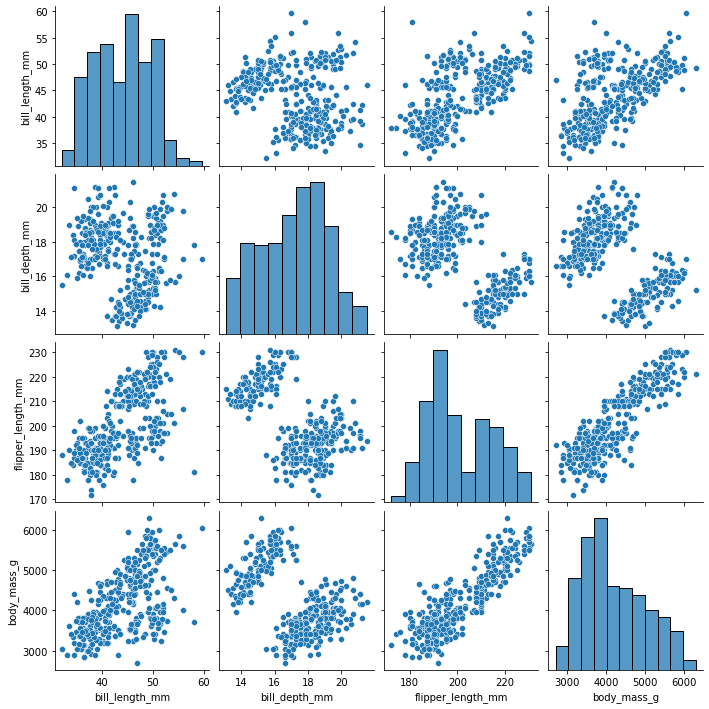

In [38]:
sns.pairplot(penguins_without_na)

Het zijn zoweerzo 2 of drie clusters. flipper_length/bill_length doet heel erg denken aan drie clusters. Maar bill/depth/body_mass doet heel erg denken aan 2 clusters bijvoorbeed. Als we de context van de dataset proberen te vergeten (omdat we al weten dat er drie soorten zijn). Is mijn antwoord om voor 2 clusters te gaan.

In [39]:
penguins_without_na.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [40]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins_without_na[features])

In [41]:
penguins_without_na['cluster'] = km.predict(penguins_without_na[features])

<ipython-input-41-bcc0b0a79292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_without_na['cluster'] = km.predict(penguins_without_na[features])


In [42]:
penguins_without_na.cluster.value_counts()

0    203
1    130
Name: cluster, dtype: int64

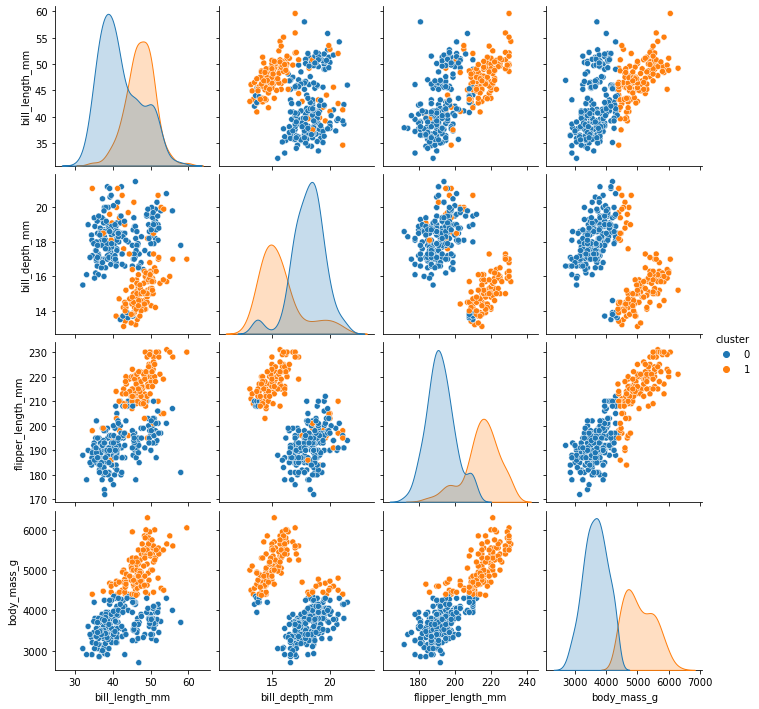

In [43]:
sns.pairplot(penguins_without_na, hue="cluster")

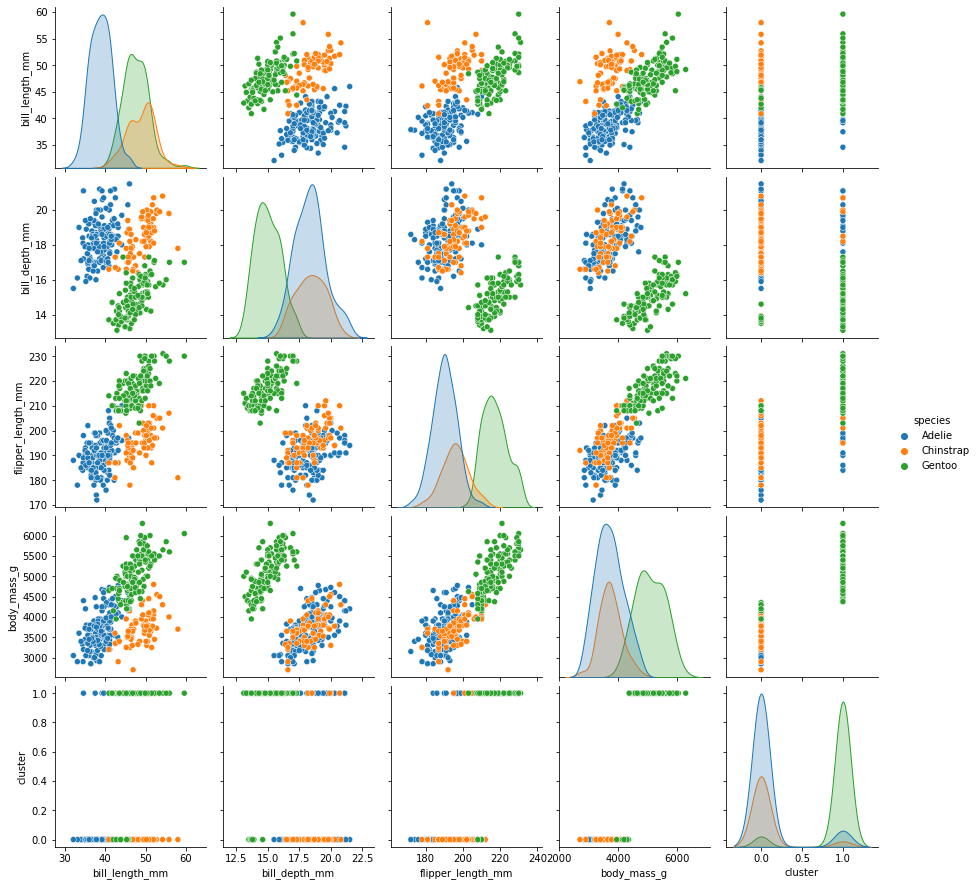

In [44]:
sns.pairplot(penguins_without_na, hue="species")

In [45]:
metrics.silhouette_score(penguins_without_na[features], km.labels_, metric='euclidean')

0.6307117469850305

In [46]:
contingency_table = penguins_without_na.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster      0    1
species            
Adelie     132   14
Chinstrap   63    5
Gentoo       8  111

In elke cluster zitten penguins van alle drie de soorten, maar in cluster 0 bestaat het overgrote deel uit de Adelie en chinstrap species, en in cluster 1 bestaat het overgrote deel uit Gentoo penguins. Het feit dat Adelie en Chinstrap met zo'n grote hoeveelheid aantallen in dezelfde cluster geplaatst zijn, betekent waarschijnlijk dat deze penguin redelijk overeenkomen uit de gemeten gegevens. in de pairplot waar de species gekleurd zijn, zien we ook bij body_mass_g/bill_depth_mm dat de twee soorten heel dicht op en door mekaar zitten.